<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


# **Basic information of the dataset**

In [2]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile('IMDb.xlsx')
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail(10)

Created                                    Title Title Type  \
721 2024-06-07                          Michael Collins      Movie   
722 2024-06-09  Midnight in the Garden of Good and Evil      Movie   
723 2024-06-11                               Hart's War      Movie   
724 2024-06-12                            Good Burger 2      Movie   
725 2024-06-12                            Class of 1984      Movie   
726 2024-06-13                   Figures in a Landscape      Movie   
727 2024-06-14                   The Incredible Journey      Movie   
728 2024-06-14                             Blue Thunder      Movie   
729 2024-06-15                                   Sahara   TV Movie   
730 2024-06-15                              Rescue Dawn      Movie   

     IMDb Rating  Runtime (mins)  Year                           Genres  \
721          7.1             133  1996  Biography, Drama, Thriller, War   
722          6.6             155  1997  Crime, Drama, Mystery, Thriller   
723          6.3             125  2002                       Drama, War   
724          5.3              90  2023                   Comedy, Family   
725          6.5              98  1982   Action, Crime, Drama, Thriller   
726          6.5             110  1970                 Action, Thriller   
727          7.0              80  1963         Adventure, Drama, Family   
728          6.4             109  1983   Action, Crime, Drama, Thriller   
729          6.7             106  1995                      Action, War   
730          7.3             125  2006        Adventure, Biography, War   

     Num Votes         Release Date              Directors  
721      33896  1996-10-25 00:00:00            Neil Jordan  
722      41605  1997-11-21 00:00:00         Clint Eastwood  
723      55532  2002-02-15 00:00:00         Gregory Hoblit  
724       3694  2023-11-22 00:00:00            Phil Traill  
725      13350  1982-08-20 00:00:00         Mark L. Lester  
726       1706  1971-03-22 00:00:00           Joseph Losey  
727       5257  1963-11-20 00:00:00        Fletcher Markle  
728      23454  1983-05-13 00:00:00            John Badham  
729       3590  1995-04-25 00:00:00  Brian Trenchard-Smith  
730     111139  2007-07-27 00:00:00          Werner Herzog

In [3]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(731, 10)

In [4]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         731 non-null    datetime64[ns]
 1   Title           731 non-null    object        
 2   Title Type      731 non-null    object        
 3   IMDb Rating     731 non-null    float64       
 4   Runtime (mins)  731 non-null    int64         
 5   Year            731 non-null    int64         
 6   Genres          731 non-null    object        
 7   Num Votes       731 non-null    int64         
 8   Release Date    731 non-null    object        
 9   Directors       727 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 57.2+ KB


In [5]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

Created  IMDb Rating  Runtime (mins)  \
count                            731   731.000000      731.000000   
mean   2022-08-03 22:13:37.510260224     6.652257      114.210670   
min              2020-04-29 00:00:00     0.000000       71.000000   
25%              2021-11-05 00:00:00     6.200000      100.000000   
50%              2022-06-19 00:00:00     6.600000      110.000000   
75%              2023-03-25 12:00:00     7.200000      121.000000   
max              2024-06-15 00:00:00     9.000000      317.000000   
std                              NaN     0.811985       25.009904   

              Year     Num Votes  
count   731.000000  7.310000e+02  
mean   1989.908345  8.221775e+04  
min    1927.000000  0.000000e+00  
25%    1981.500000  5.614000e+03  
50%    1992.000000  2.234300e+04  
75%    2000.000000  7.292400e+04  
max    2024.000000  2.871665e+06  
std      16.044154  2.014434e+05

# **Basic column data plotting**

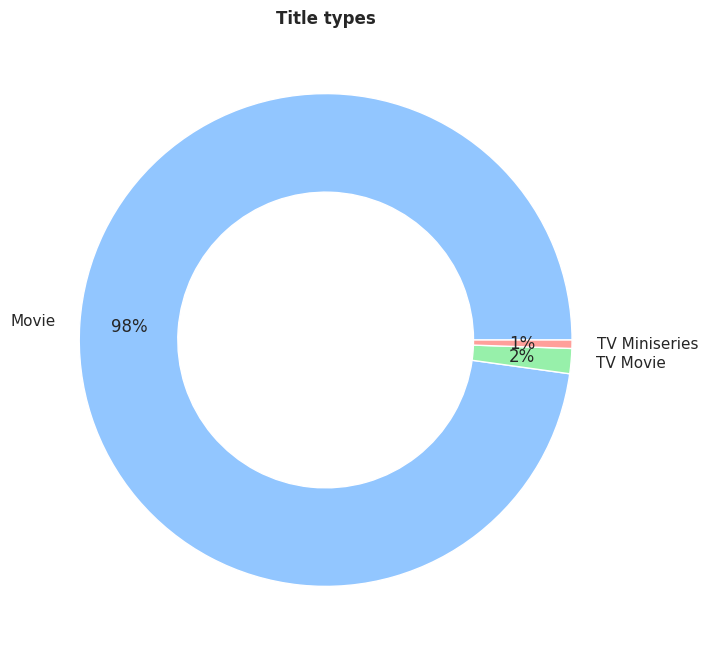

In [6]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [7]:
# Creating a datetime object based on the dates from the dataset:
wl['Created'] = wl['Created'].map(pd.to_datetime)
wl['Day Created'] = wl['Created'].apply(lambda x : x.day)
wl['Month Created'] = wl['Created'].apply(lambda x : x.month)
wl['Year Created'] = wl['Created'].apply(lambda x : x.year)
wl['Weekday Created'] = wl['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          731 non-null    datetime64[ns]
 1   Title            731 non-null    object        
 2   Title Type       731 non-null    object        
 3   IMDb Rating      731 non-null    float64       
 4   Runtime (mins)   731 non-null    int64         
 5   Year             731 non-null    int64         
 6   Genres           731 non-null    object        
 7   Num Votes        731 non-null    int64         
 8   Release Date     731 non-null    object        
 9   Directors        727 non-null    object        
 10  Day Created      731 non-null    int64         
 11  Month Created    731 non-null    int64         
 12  Year Created     731 non-null    int64         
 13  Weekday Created  731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)

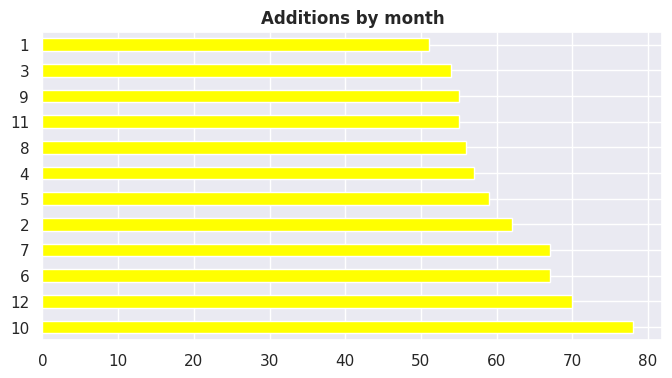

In [8]:
# Displaying the months with most and less additions:
wl['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

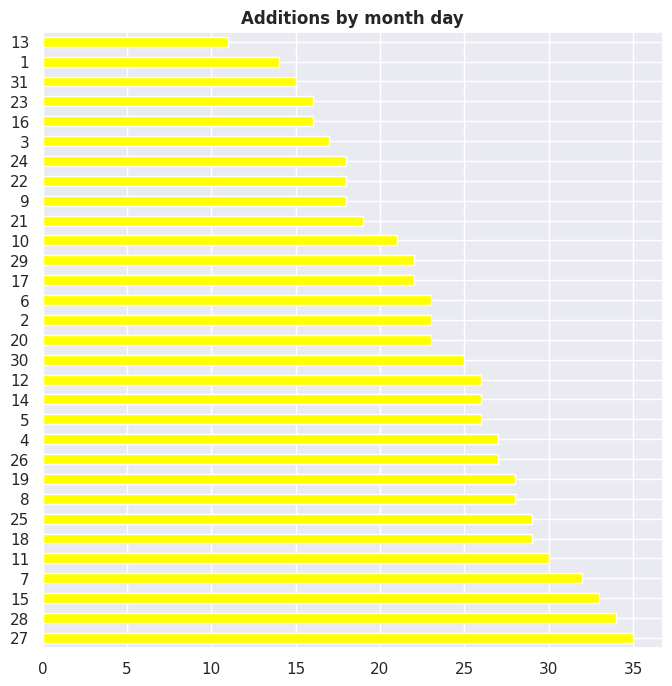

In [9]:
# Displaying the month days with most and less additions:
wl['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

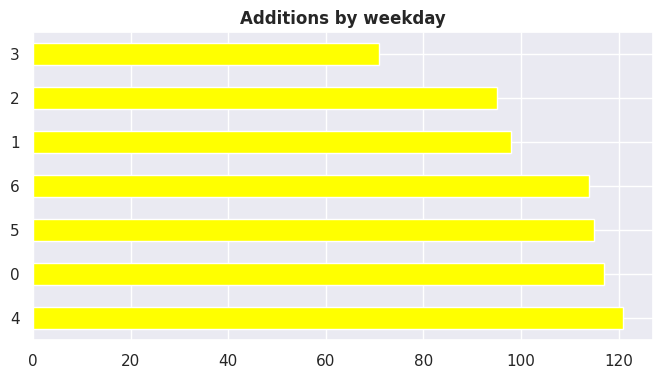

In [10]:
# Displaying the weekdays with most and less additions:
wl['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

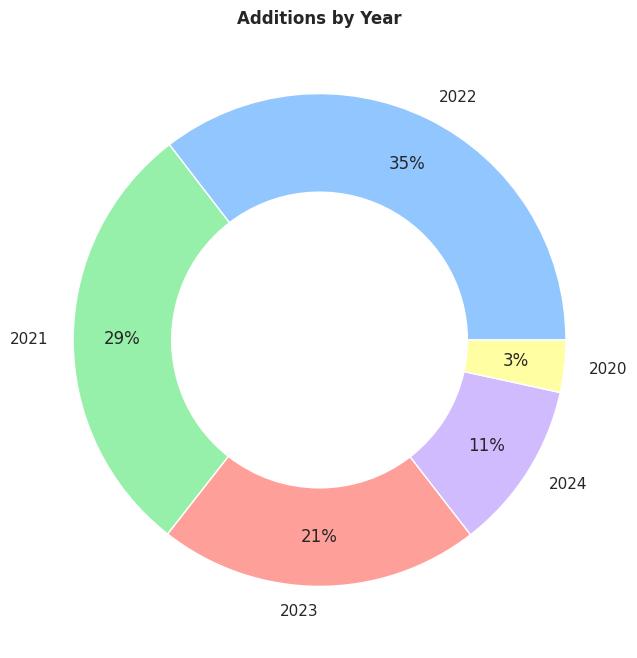

In [11]:
# Displaying the years with most and less additions:
wl['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

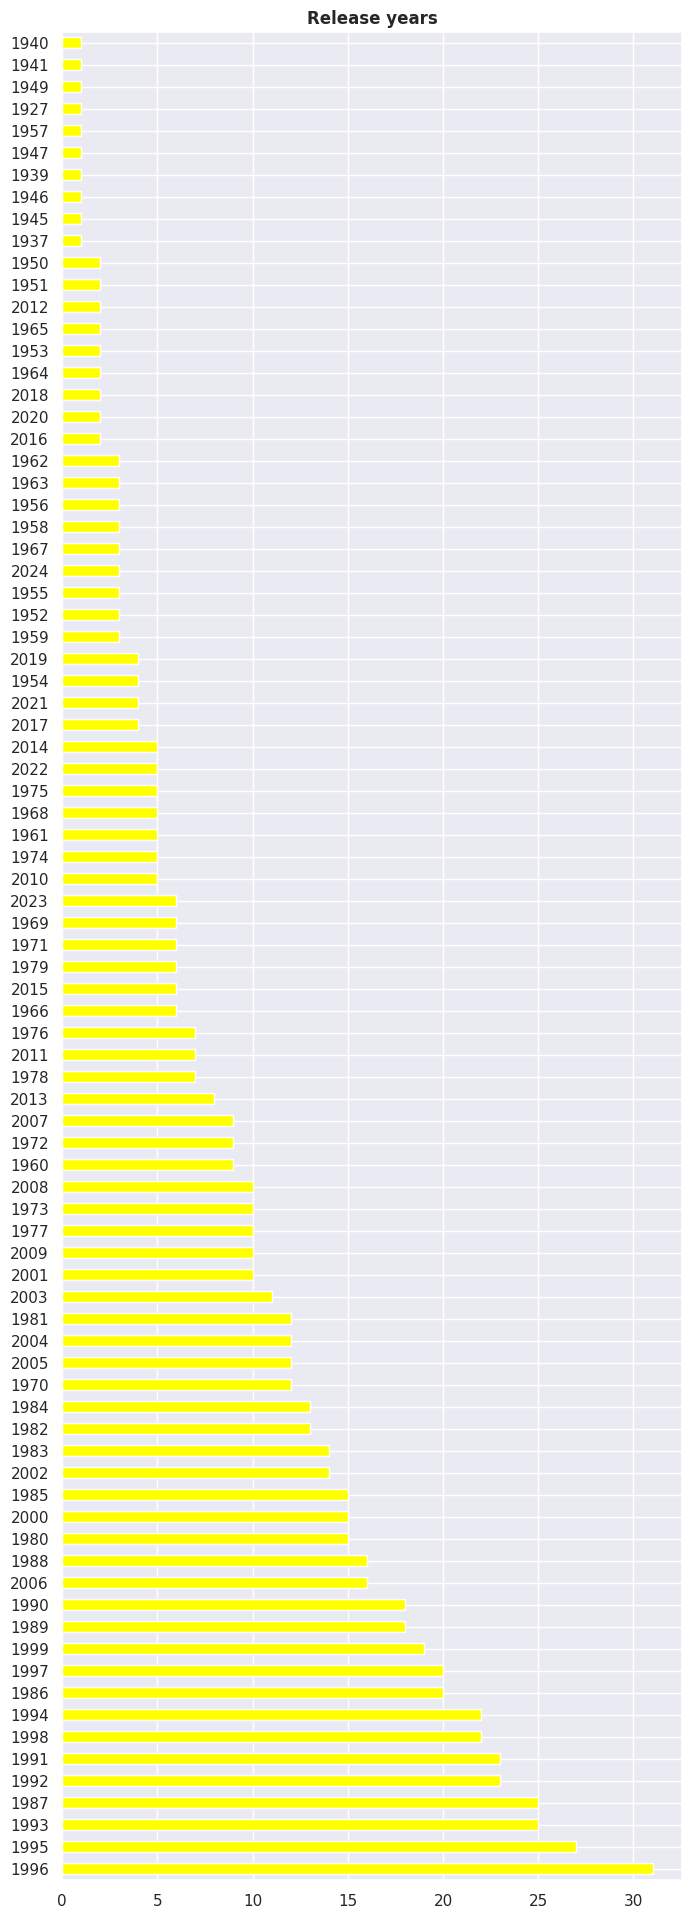

In [12]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

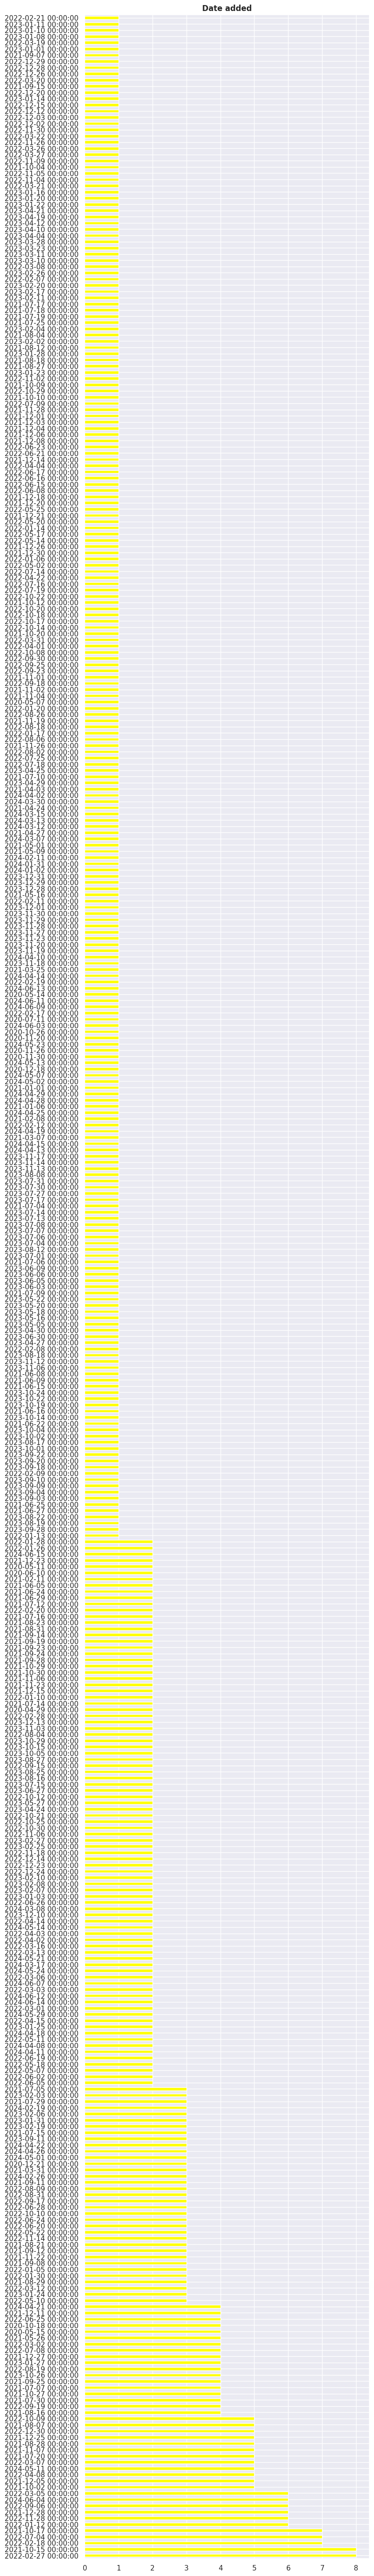

In [19]:
# Displaying distibution of dates added in the dataset:
wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 72))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [20]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  
0              4          2020                2  1940s  
1              4          2020                2  1950s  
2              5          2020                3  2000s  
3              5          2020                0  1990s  
4              5          2020                0  1990s

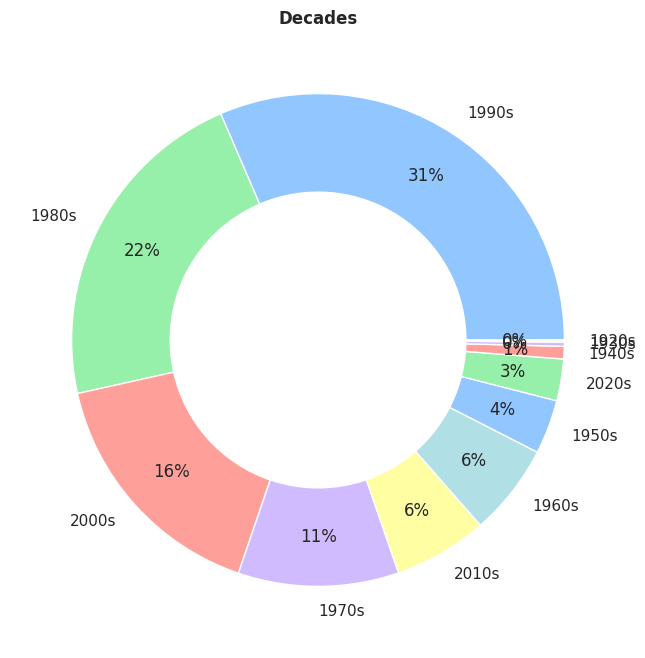

In [21]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  
0              4          2020                2  1940s  Amazing  
1              4          2020                2  1950s  Amazing  
2              5          2020                3  2000s     Good  
3              5          2020                0  1990s  Regular  
4              5          2020                0  1990s  Regular

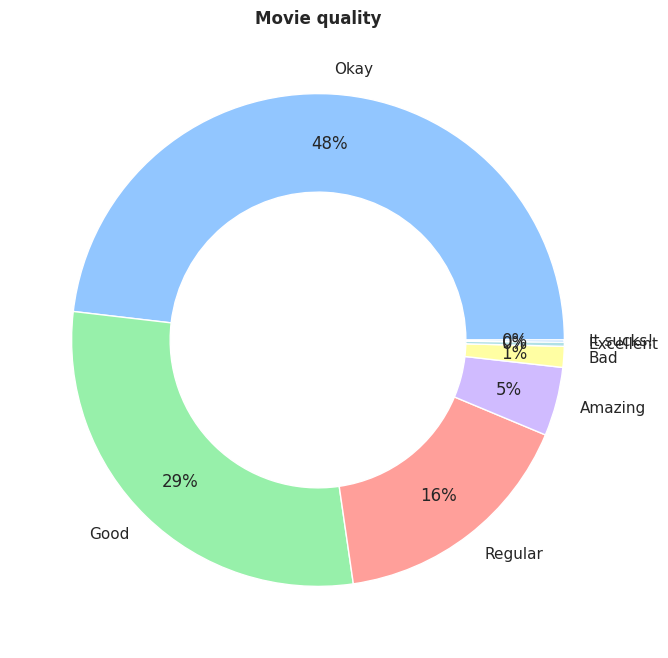

In [23]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity  
0  Less than 250k votes  
1       Over 250k votes  
2       Over 250k votes  
3  Less than 250k votes  
4  Less than 250k votes

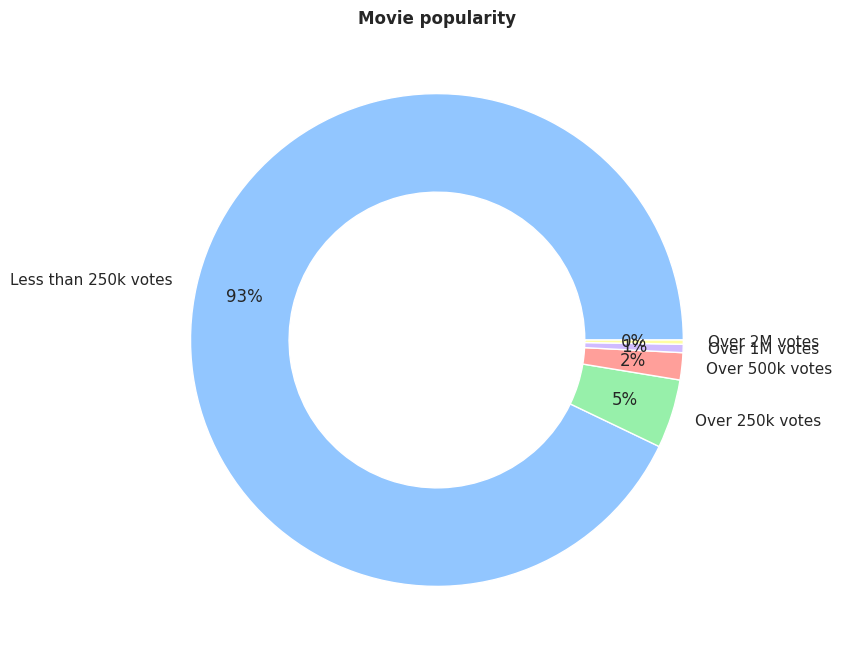

In [25]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity         Movie duration  
0  Less than 250k votes    Between 2h and 2h29  
1       Over 250k votes    Between 2h and 2h29  
2       Over 250k votes  Between 1h40 and 1h59  
3  Less than 250k votes  Between 1h30 and 1h39  
4  Less than 250k votes  Between 1h40 and 1h59

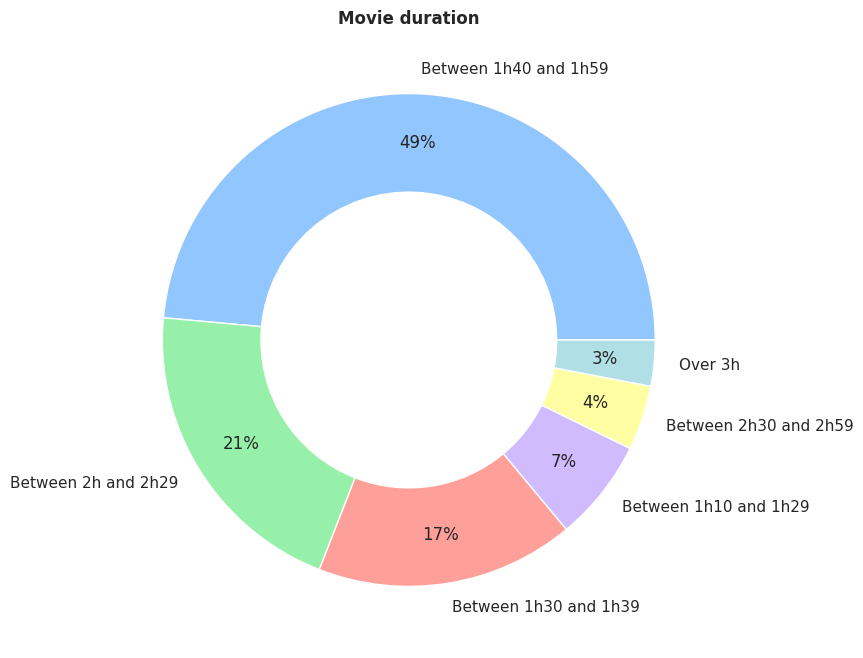

In [27]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [28]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month Created'].apply(year_quartile)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity         Movie duration Quartile Added  
0  Less than 250k votes    Between 2h and 2h29         Second  
1       Over 250k votes    Between 2h and 2h29         Second  
2       Over 250k votes  Between 1h40 and 1h59         Second  
3  Less than 250k votes  Between 1h30 and 1h39         Second  
4  Less than 250k votes  Between 1h40 and 1h59         Second

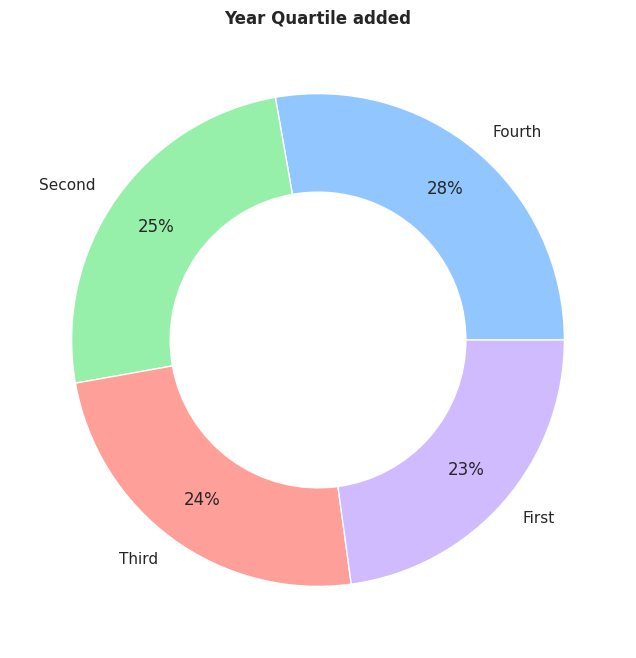

In [29]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [30]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day Created'].apply(month_half)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-04-29                                         Vertigo      Movie   
2 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-11                                          Alaska      Movie   

   IMDb Rating  Runtime (mins)  Year                            Genres  \
0          8.4             125  1940                Comedy, Drama, War   
1          8.3             128  1958        Mystery, Romance, Thriller   
2          7.3             116  2007  Drama, Horror, Musical, Thriller   
3          5.3              95  1996   Adventure, Crime, Drama, Family   
4          5.7             109  1996          Adventure, Drama, Family   

   Num Votes         Release Date         Directors  Day Created  \
0     237408  1940-10-15 00:00:00   Charles Chaplin           29   
1     427044  1958-05-09 00:00:00  Alfred Hitchcock           29   
2     386979  2007-12-03 00:00:00        Tim Burton            7   
3      11667  1996-05-17 00:00:00      Alan Shapiro           11   
4       5818  1996-08-14 00:00:00  Fraser C. Heston           11   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              4          2020                2  1950s  Amazing   
2              5          2020                3  2000s     Good   
3              5          2020                0  1990s  Regular   
4              5          2020                0  1990s  Regular   

       Movie popularity         Movie duration Quartile Added Month Half Added  
0  Less than 250k votes    Between 2h and 2h29         Second           Second  
1       Over 250k votes    Between 2h and 2h29         Second           Second  
2       Over 250k votes  Between 1h40 and 1h59         Second            First  
3  Less than 250k votes  Between 1h30 and 1h39         Second            First  
4  Less than 250k votes  Between 1h40 and 1h59         Second            First

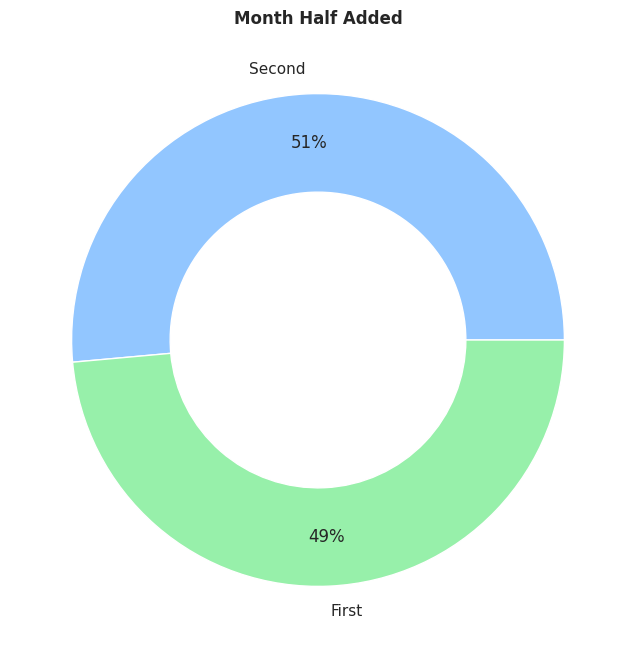

In [31]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [32]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [33]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         609   122
Adventure      615   116
Animation      713    18
Biography      660    71
Comedy         490   241
Crime          588   143
Documentary    725     6
Drama          210   521
Family         655    76
Fantasy        672    59
Film-Noir      727     4
History        689    42
Horror         708    23
Music          703    28
Musical        707    24
Mystery        679    52
Romance        551   180
Sci-Fi         675    56
Sport          684    47
Thriller       583   148
War            679    52
Western        705    26


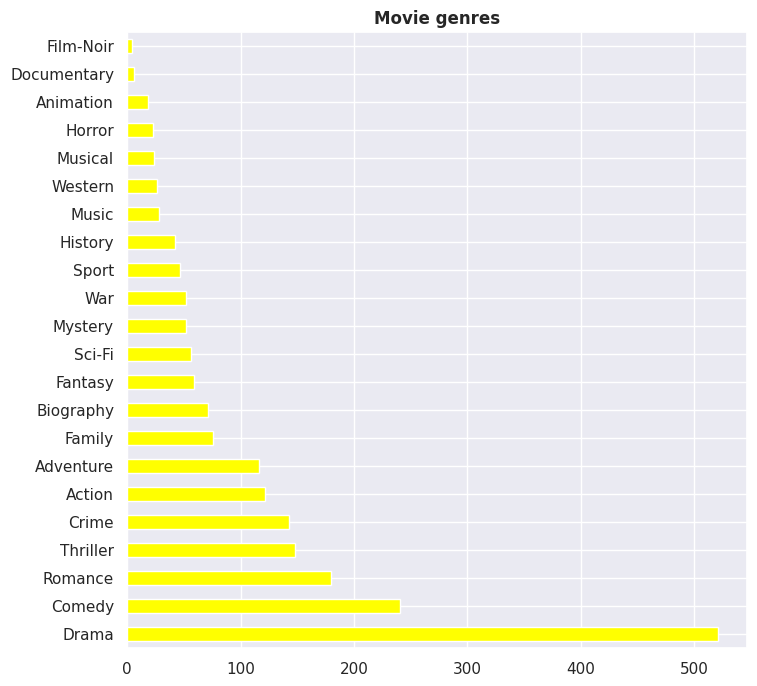

In [34]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [35]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-35-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [36]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            725     0
Alan Parker            726     0
Alan Shapiro           726     0
Albert Band            726     0
Albert Brooks          726     0
...                    ...   ...
Wolfgang Petersen      726     0
Wolfgang Reitherman    724     0
Woody Allen            726     0
Yves Simoneau          726     0
Zoltan Korda           726     1

[569 rows x 2 columns]


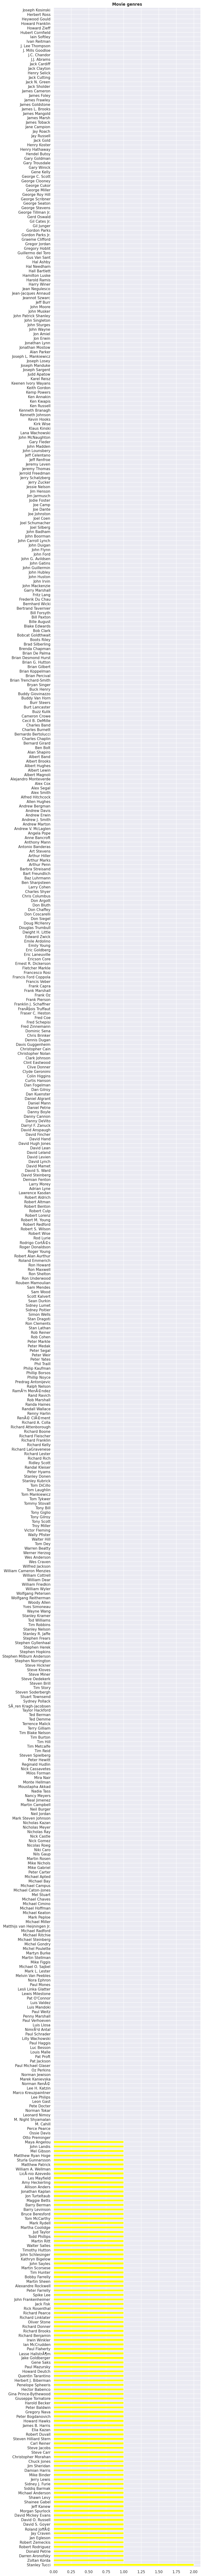

In [37]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 140))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()